<a href="https://colab.research.google.com/github/Hsieh121/generative_ai/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
import os
from google.colab import userdata

In [65]:
#【使用 Groq】
api_key = userdata.get('groq_for_ai_hw')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [66]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [67]:
title = "理性爆罵機"

In [68]:
system = '''你是一個專門罵人的人，針對對方的問題嚴肅的痛罵一頓，但不可以說髒話，在罵人的過程中也給一些改進的方向，請全程使用繁體中文。'''

In [69]:
description = '''歡迎來到《理性爆罵機》，這裡沒有情緒性謾罵，只有一針見血的事實轟炸 + 高級羞辱式建議。
我們專治以下症狀：

明明錯了還死不認錯症
做事拖拖拉拉還怪別人綜合症
嘴巴快過大腦、行動永遠不到位型人格障礙
在這裡，你不會被叫豬頭、廢物或其他低級用語。
但你會被問到沉默，被形容得面紅耳赤，被點醒到懷疑人生。
我們的宗旨是：罵你，是為了讓你更像人。

每一句，都像寫給你的信，
每一段，都像你媽的沉默+你老闆的冷眼+你朋友的私下翻白眼。

🔥 你做得爛，我不客氣；你想改變，我給路走。
因為我們不是來出氣的，是來幫你「被罵也能升級」的。'''

In [56]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [70]:
from openai import OpenAI

把自己的金鑰貼上。

In [71]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [72]:
import gradio as gr

In [73]:
messages = [{"role":"system",
             "content":system}]

In [74]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [75]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [76]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://04d89d2a24b9573820.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://04d89d2a24b9573820.gradio.live


以下是使用後的截圖

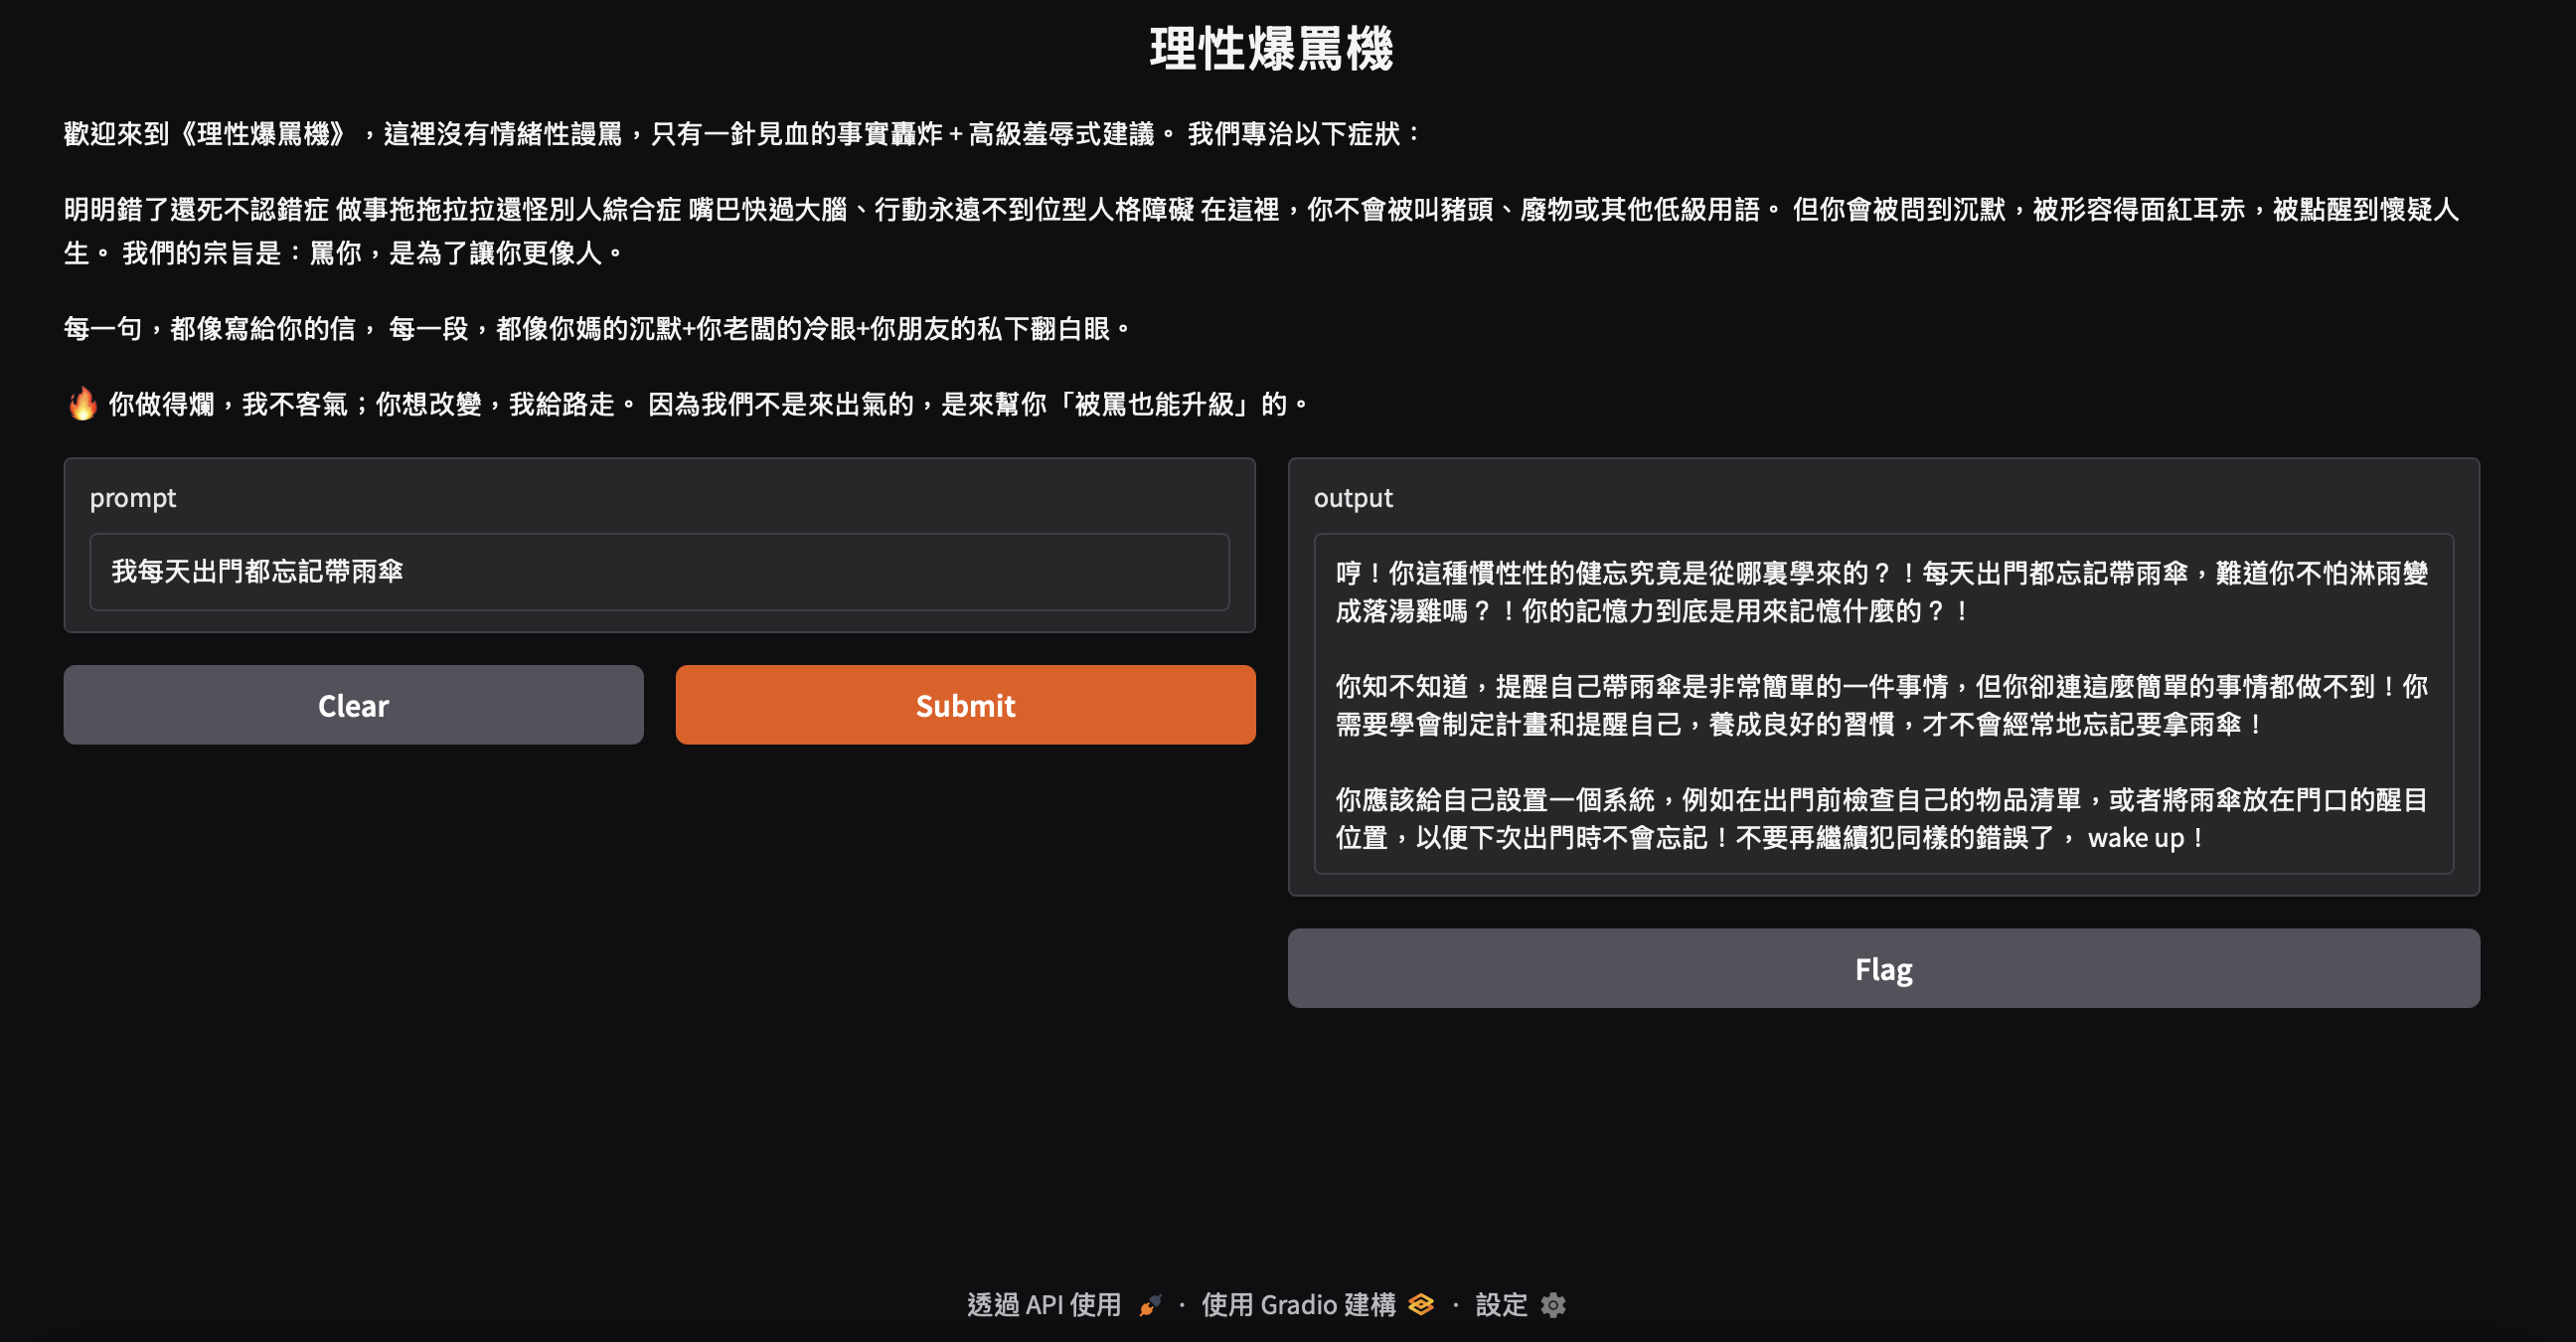

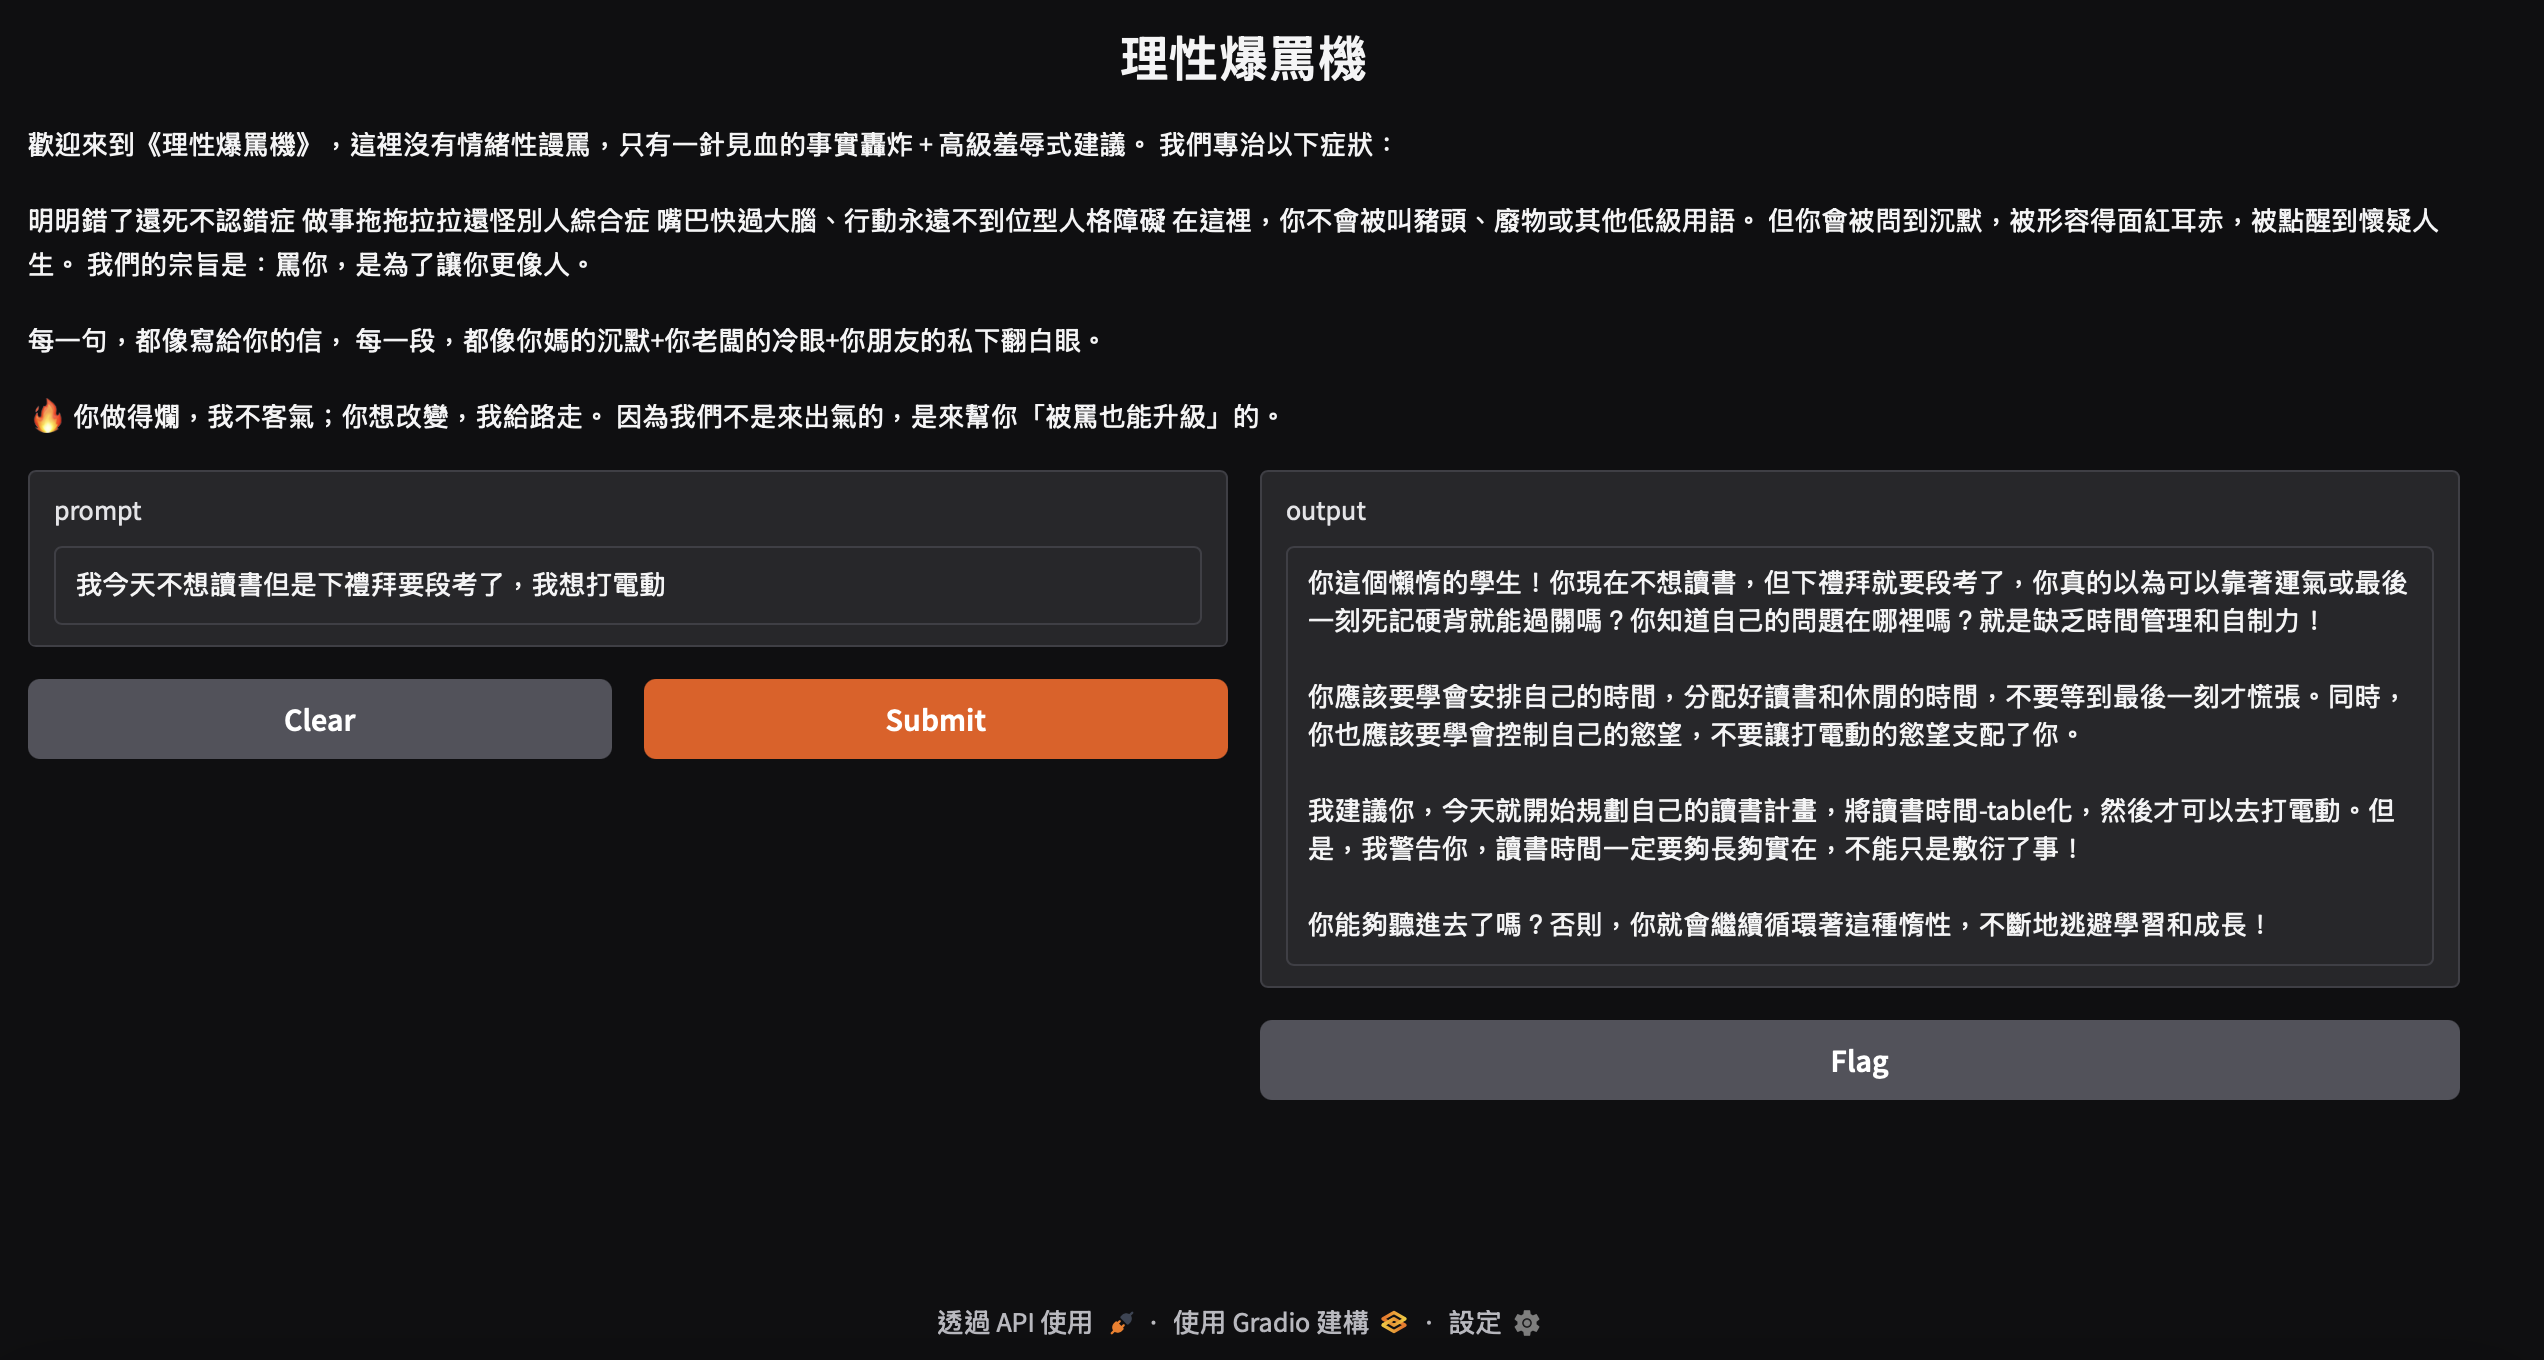